In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing #For Label Encoding
from sklearn.model_selection import train_test_split

In [57]:
df=pd.read_csv(r"D:\Coderscave\Mobile price classification\ndtv_data_final.csv")

# Data Exploration

In [58]:
df

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,4,...,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,4,...,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,2,...,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999
1357,1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1,...,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2498


In [59]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [60]:
df.tail()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
1354,1354,Intex Aqua A2,Intex,Aqua A2,1500,4.0,Yes,480,800,4,...,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.0,Yes,480,854,4,...,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.5,Yes,480,854,2,...,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999
1357,1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.0,Yes,480,800,1,...,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2498
1358,1358,iBall Andi Avonte 5,iBall,Andi Avonte 5,2150,5.0,Yes,480,854,4,...,8.0,0.0,Android,Yes,Yes,Yes,2,Yes,No,3999


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [62]:
df.describe()

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


In [63]:
df.dtypes

Unnamed: 0                  int64
Name                       object
Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                      object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
3G                         object
4G/ LTE                    object
Price                       int64
dtype: object

# Data preprocessing

In [64]:
df.isnull().sum()

Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [65]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,4,...,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,4,...,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,2,...,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999
1357,1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1,...,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2498


### Variable Creation / Replacing

In [66]:
df["4G/ LTE"].replace({"Yes":1,"No":0},inplace=True)

#df.insert(20,"4G/Lte",(df["4G/ LTE"].apply(lambda x:1 if x=="Yes" else 0)),allow_duplicates=True)

In [67]:
df.insert(18,"3g",(df["3G"].apply(lambda x:1 if x=="Yes" else 0)),allow_duplicates=True)


In [68]:
df.insert(16,"Gps",(df["GPS"].apply(lambda x:1 if x=="Yes" else 0)),allow_duplicates=True)


In [69]:
df.insert(14,"BT",(df["Bluetooth"].apply(lambda x:1 if x=="Yes" else 0)),allow_duplicates=True)


In [70]:
df.insert(12,"WiFi",(df["Wi-Fi"].apply(lambda x:1 if x=="Yes" else 0)),allow_duplicates=True)

In [71]:
df.insert(6,"Touch_screen",(df["Touchscreen"].apply(lambda x:1 if x=="Yes" else 0)),allow_duplicates=True)

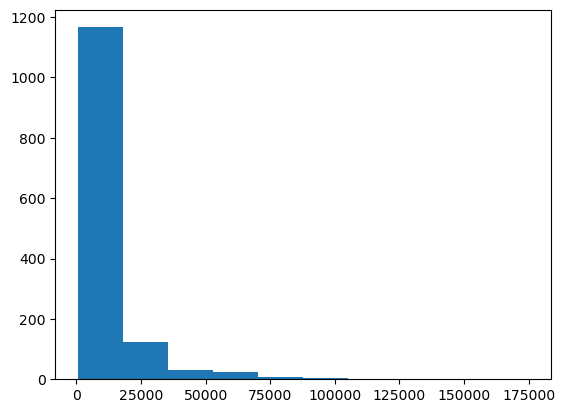

In [72]:
plt.hist(data=df,x="Price")
plt.show()

In [73]:
def pricer(x):
    if x<=15000:
        return 0
    elif x>15000 and x<=50000:
        return 1
    else:
        return 2

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1358
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touch_screen            1359 non-null   int64  
 7   Touchscreen             1359 non-null   object 
 8   Resolution x            1359 non-null   int64  
 9   Resolution y            1359 non-null   int64  
 10  Processor               1359 non-null   int64  
 11  RAM (MB)                1359 non-null   int64  
 12  Internal storage (GB)   1359 non-null   float64
 13  WiFi                    1359 non-null   int64  
 14  Rear camera             1359 non-null   

In [75]:
df.insert(26,"Price_Range",df["Price"].apply(pricer))

In [76]:
df.drop(["Unnamed: 0","Name","Model","Touchscreen","3G","GPS","Bluetooth","Wi-Fi","Price"], 
        axis=1,inplace=True)

### Label encoding

In [77]:
le=preprocessing.LabelEncoder()

In [78]:
df["Operating system"]=le.fit_transform(df["Operating system"])
df["Operating system"].unique()

array([0, 6, 2, 1, 5, 4, 3])

In [79]:
df

,Brand,Battery capacity (mAh),Screen size (inches),Touch_screen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),WiFi,Rear camera,Front camera,BT,Operating system,Gps,3g,Number of SIMs,4G/ LTE,Price_Range
0,OnePlus,4085,6.67,1,1440,3120,8,12000,256.000,1,48.0,16.0,1,0,1,1,2,1,2
1,Realme,4000,6.50,1,1080,2400,8,6000,64.000,1,64.0,16.0,1,0,1,1,2,1,1
2,Apple,3969,6.50,1,1242,2688,6,4000,64.000,1,12.0,12.0,1,6,1,1,2,1,2
3,Apple,3110,6.10,1,828,1792,6,4000,64.000,1,12.0,12.0,1,6,1,1,2,1,2
4,LG,4000,6.40,1,1080,2340,8,6000,128.000,1,12.0,32.0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex,1500,4.00,1,480,800,4,512,8.000,1,5.0,0.3,1,0,1,1,2,0,0
1355,Videocon,2000,5.00,1,480,854,4,1000,8.000,1,8.0,5.0,1,0,1,1,2,0,0
1356,Intex,1700,4.50,1,480,854,2,512,4.000,1,5.0,2.0,1,0,0,1,2,0,0
1357,iBall,1250,4.00,1,480,800,1,256,0.512,1,2.0,0.3,1,0,1,1,2,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

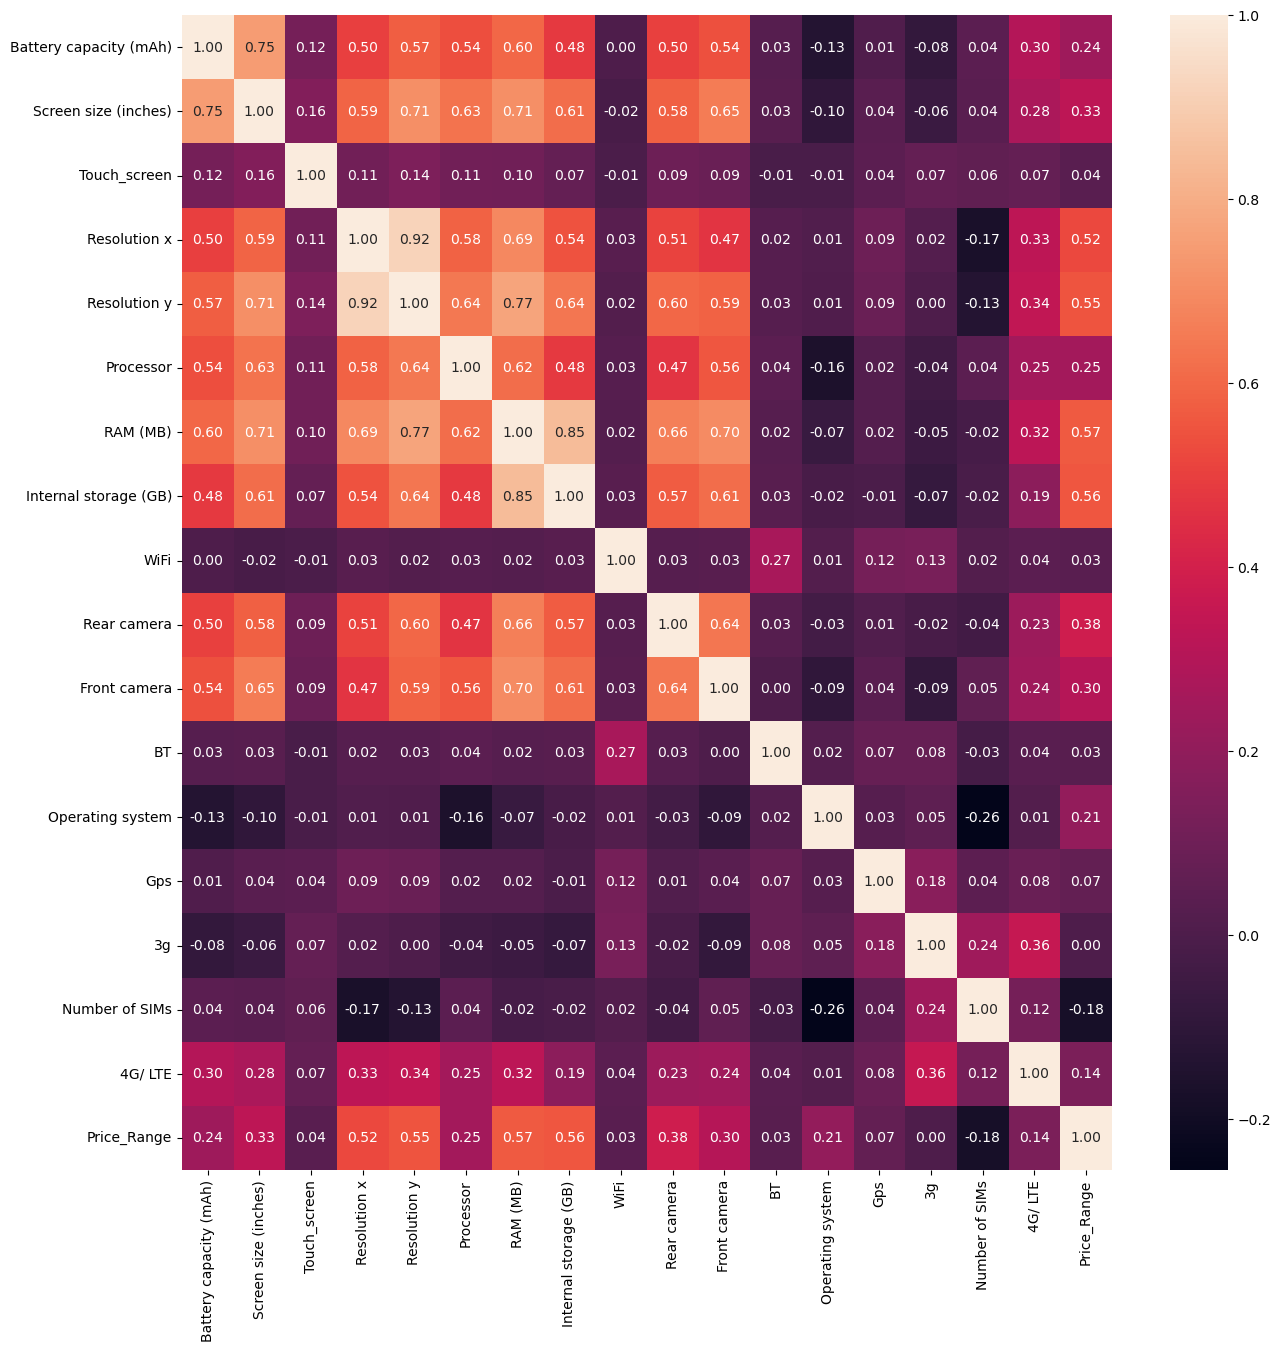

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show

#### Features such as Battery, Screen size, Resolution, RAM, Internal Storage, Rear & Front camera, OS, 4G/Lte affects the Mobile price.

In [81]:
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

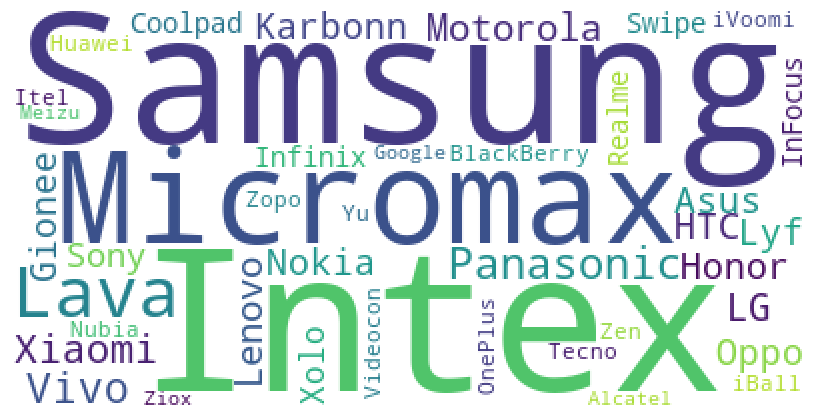

In [82]:
words = ' '.join([text for text in df["Brand"]])

wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


#### Samsung and Intex were the more frequently used mobile brands.

In [83]:
df.drop(["Brand","3g","BT","WiFi","Number of SIMs","Touch_screen","Gps"],axis=1,inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Battery capacity (mAh)  1359 non-null   int64  
 1   Screen size (inches)    1359 non-null   float64
 2   Resolution x            1359 non-null   int64  
 3   Resolution y            1359 non-null   int64  
 4   Processor               1359 non-null   int64  
 5   RAM (MB)                1359 non-null   int64  
 6   Internal storage (GB)   1359 non-null   float64
 7   Rear camera             1359 non-null   float64
 8   Front camera            1359 non-null   float64
 9   Operating system        1359 non-null   int32  
 10  4G/ LTE                 1359 non-null   int64  
 11  Price_Range             1359 non-null   int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 132.7 KB


In [85]:
import plotly.express as px

In [86]:
col=["Resolution x","Resolution y","RAM (MB)"]

In [87]:
for i in col :
    fig=px.box(df,y=i)
    fig.show()

In [88]:
Q1_b=df["Battery capacity (mAh)"].quantile(0.25)
Q3_b=df["Battery capacity (mAh)"].quantile(0.75)
iqr=Q3_b-Q1_b
lt=Q1_b-(1.5*iqr)
ut=Q3_b+(1.5*iqr)
df=df[(df["Battery capacity (mAh)"]>lt) & (df["Battery capacity (mAh)"]<ut)]


fig=px.box(df,y="Battery capacity (mAh)")
fig.show()

In [89]:
Q1_s=df["Screen size (inches)"].quantile(0.25)
Q3_s=df["Screen size (inches)"].quantile(0.75)
iqr=Q3_s-Q1_s
lt=Q1_s-(1.5*iqr)
ut=Q3_s+(1.5*iqr)
df=df[(df["Screen size (inches)"]>lt) & (df["Screen size (inches)"]<ut)]


fig=px.box(df,y="Screen size (inches)")
fig.show()

In [90]:
for i in col:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    iqr=Q3-Q1
    lt=Q1-(1.5*iqr)
    ut=Q3+(1.5*iqr)
    df=df[(df[i]>lt) & (df[i]<ut)]


In [91]:
for i in col :
    fig=px.box(df,y=i)
    fig.show()

# Splitting

In [92]:
x=df.drop(columns=["Price_Range"])

In [93]:
y=df["Price_Range"]

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

# Algorithms

## 1.Logistic Regression

In [95]:
logm=LogisticRegression()

In [96]:
logm.fit(x_train,y_train)

LogisticRegression()

In [97]:
logm.score(x_test,y_test)

0.8993506493506493

## 2.Random Forest Classifier

In [98]:
rfc=RandomForestClassifier(n_estimators=220)

In [99]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=220)

In [100]:
rfc.score(x_test,y_test)

0.9155844155844156

## 3.Decision Tree

In [101]:
dtree=DecisionTreeClassifier()

In [102]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
dtree.score(x_test,y_test)

0.8863636363636364

## 4.KNN

In [104]:
knn=KNeighborsClassifier(n_neighbors=5)

In [105]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [106]:
knn.score(x_test,y_test)

0.8831168831168831

## 5.Support vector Machine

In [107]:
svm=SVC()

In [108]:
svm.fit(x_train,y_train)

SVC()

In [109]:
svm.score(x_test,y_test)

0.8928571428571429

## Random forest classifier provides the highest score of 0.91 .